Tejas Bharskar 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
35/35 - 13s - 377ms/step - loss: 0.0479
Epoch 2/20
35/35 - 5s - 150ms/step - loss: 0.0110
Epoch 3/20
35/35 - 10s - 293ms/step - loss: 0.0095
Epoch 4/20
35/35 - 10s - 296ms/step - loss: 0.0120
Epoch 5/20
35/35 - 10s - 288ms/step - loss: 0.0084
Epoch 6/20
35/35 - 11s - 316ms/step - loss: 0.0070
Epoch 7/20
35/35 - 10s - 299ms/step - loss: 0.0071
Epoch 8/20
35/35 - 10s - 285ms/step - loss: 0.0065
Epoch 9/20
35/35 - 9s - 268ms/step - loss: 0.0066
Epoch 10/20
35/35 - 10s - 293ms/step - loss: 0.0070
Epoch 11/20
35/35 - 10s - 292ms/step - loss: 0.0070
Epoch 12/20
35/35 - 10s - 293ms/step - loss: 0.0061
Epoch 13/20
35/35 - 11s - 318ms/step - loss: 0.0060
Epoch 14/20
35/35 - 5s - 149ms/step - loss: 0.0061
Epoch 15/20
35/35 - 10s - 291ms/step - loss: 0.0053
Epoch 16/20
35/35 - 6s - 179ms/step - loss: 0.0077
Epoch 17/20
35/35 - 10s - 278ms/step - loss: 0.0058
Epoch 18/20
35/35 - 10s - 275ms/step - loss: 0.0048
Epoch 19/20
35/35 - 10s - 293ms/step - loss: 0.0053
Epoch 20/20
35/35 - 10s -

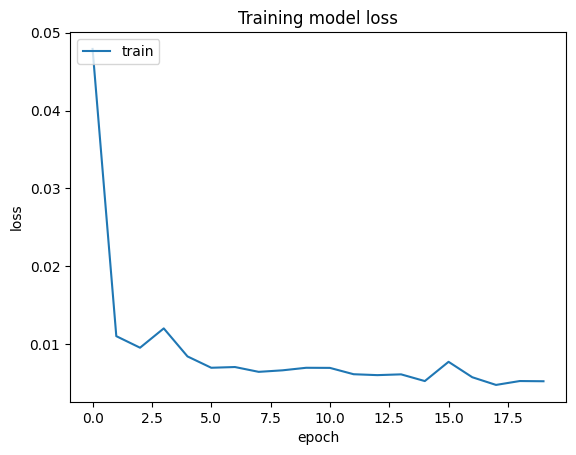

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


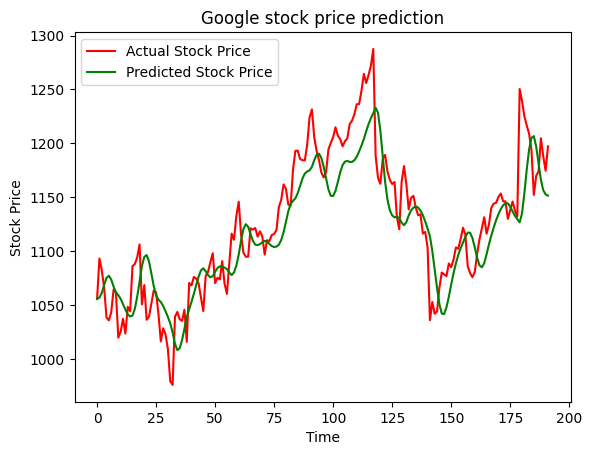

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
data = pd.read_csv("/content/Google_train_data.csv.xls")
data.head()
data.info()
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values
data.info()
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape
X_train = []
y_train = []
for i in range(60, len(trainData)): #60 : timestep // 1149 : length of the data
 X_train.append(trainData[i-60:i,0])
 y_train.append(trainData[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)
model = Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
testData = pd.read_csv('/content/Google_test_data.csv.xls')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
 X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape
y_pred = model.predict(X_test)
y_pred
predicted_price = sc.inverse_transform(y_pred)
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()